In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

/home/gustavolamonica/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('ETH_1H.csv',parse_dates=['Date'],index_col=['Date'])

In [3]:
data.head()

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2020-04-16 00:00:00,1586995200000,ETHUSD,152.94,152.94,150.39,150.39,650.188125
2020-04-15 23:00:00,1586991600000,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2020-04-15 22:00:00,1586988000000,ETHUSD,157.18,157.30,155.32,155.81,106.337279
2020-04-15 21:00:00,1586984400000,ETHUSD,158.04,158.31,157.16,157.18,55.244131
2020-04-15 20:00:00,1586980800000,ETHUSD,157.10,158.10,156.87,158.04,144.262622


In [4]:
data = data.sort_index()

In [5]:
data.head(-5)

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2016-05-09 13:00:00,1462798800,ETHUSD,0.00,12.00,0.00,9.55,432.562115
2016-05-09 14:00:00,1462802400,ETHUSD,9.55,10.00,9.55,10.00,235.774075
2016-05-09 15:00:00,1462806000,ETHUSD,10.00,10.00,9.99,9.99,10.973567
2016-05-09 16:00:00,1462809600,ETHUSD,9.99,9.99,9.79,9.83,62.379450
2016-05-09 17:00:00,1462813200,ETHUSD,9.83,9.83,9.48,9.49,329.553213
...,...,...,...,...,...,...,...
2020-04-15 15:00:00,1586962800000,ETHUSD,157.12,157.15,155.81,155.81,303.839541
2020-04-15 16:00:00,1586966400000,ETHUSD,155.81,157.52,155.74,157.12,430.083035
2020-04-15 17:00:00,1586970000000,ETHUSD,157.12,157.78,156.90,157.48,156.552221


In [6]:
data.shape

(34497, 7)

In [7]:
data.isna().sum()

Unix Timestamp    0
Symbol            0
Open              0
High              0
Low               0
Close             0
Volume            0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data = data.drop(columns=['Unix Timestamp','Symbol'])

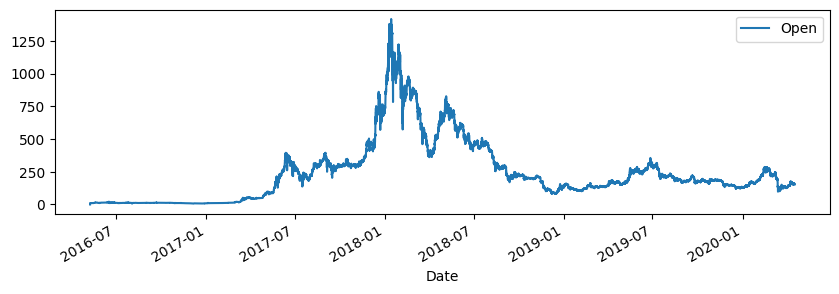

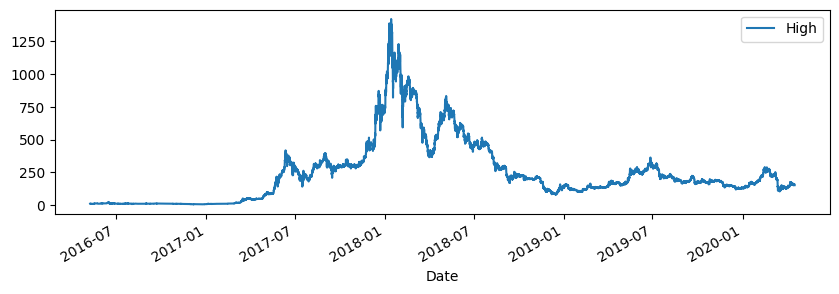

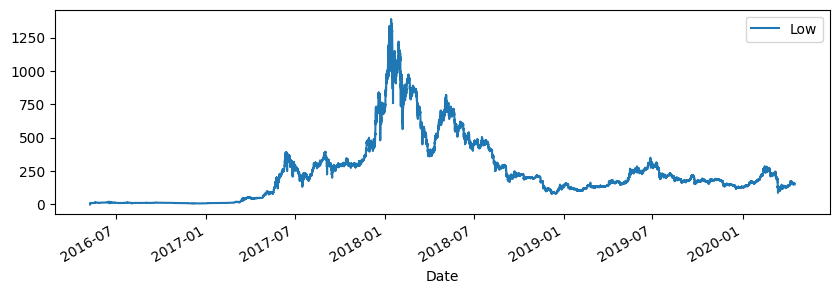

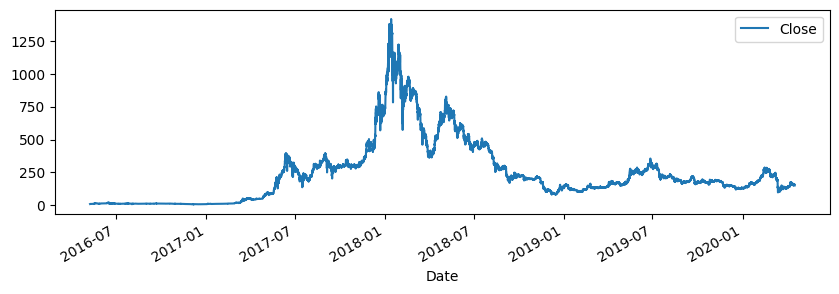

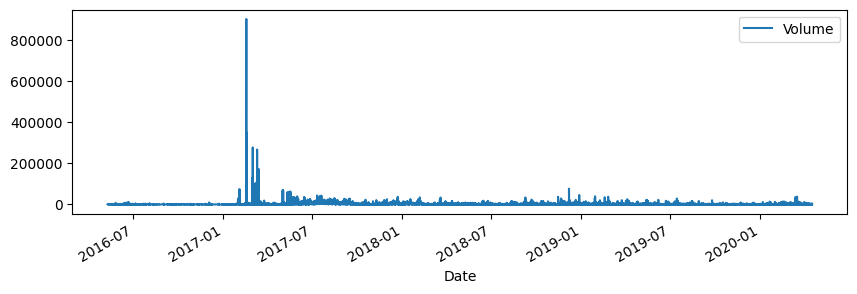

In [10]:
for i in data:
    plt.figure(figsize=(10,3))
    data[i].plot(legend=i)
    plt.show()

In [11]:
#creating the datatime features
def create_f(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['day'] = df.index.day
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofweek'] = df.index.dayofweek
    df['dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.isocalendar().week
    
    return df

In [12]:
df = create_f(data)

In [13]:
df.head()

,Open,High,Low,Close,Volume,hour,day,month,year,dayofweek,dayofyear,weekofyear
Date,,,,,,,,,,,,
2016-05-09 13:00:00,0.00,12.00,0.00,9.55,432.562115,13,9,5,2016,0,130,19
2016-05-09 14:00:00,9.55,10.00,9.55,10.00,235.774075,14,9,5,2016,0,130,19
2016-05-09 15:00:00,10.00,10.00,9.99,9.99,10.973567,15,9,5,2016,0,130,19
2016-05-09 16:00:00,9.99,9.99,9.79,9.83,62.379450,16,9,5,2016,0,130,19
2016-05-09 17:00:00,9.83,9.83,9.48,9.49,329.553213,17,9,5,2016,0,130,19


<AxesSubplot:>

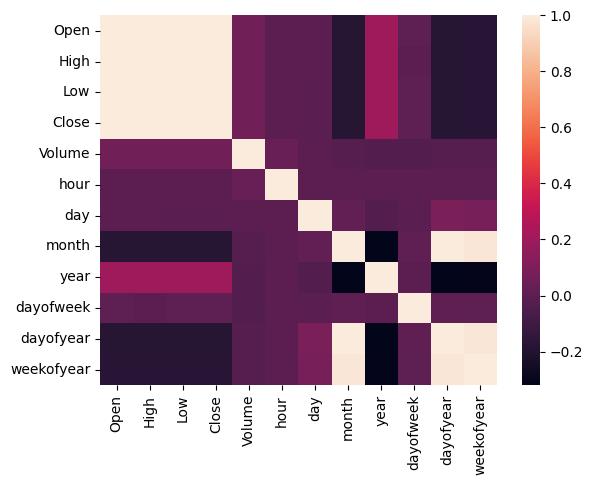

In [14]:
#correlation
sns.heatmap(df.corr())

In [15]:
#generating windows 
# 24 hour window to predict 25th hour using only close

close = df.iloc[:,3]
windows=[]
target=[]
length = 240
for i in (range(len(close)-length)):
    x = close.iloc[i:i+length]
    y = close.iloc[i+length]
    windows.append(x)
    target.append(y)
    
    
windows=np.array(windows)
target=np.array(target).reshape(-1,1)




In [16]:
#creating train and test data

from sklearn.preprocessing import MinMaxScaler



sc = MinMaxScaler()
windows_sc = sc.fit_transform(windows)
target_sc = sc.fit_transform(target)

windows_sc = windows_sc.reshape((len(windows_sc),length,1))

In [17]:
#splitting

split = int(0.8*len(windows_sc))

X_train = windows_sc[:split,:,:]
X_test = windows_sc[split:,:,:]
y_train = target_sc[:split,:]
y_test = target_sc[split:,:]

In [18]:
print(X_train.shape,y_train.shape)

(27405, 240, 1) (27405, 1)


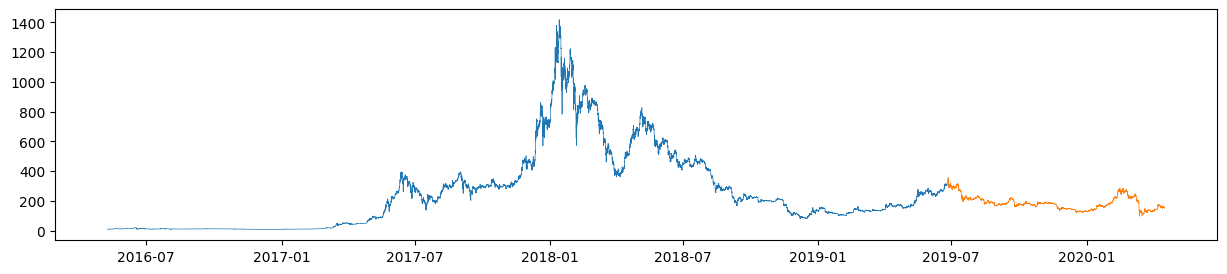

In [19]:
plt.figure(figsize=(15,3))
plt.plot(df['Close'][:split],label='Train',linewidth=0.5)
plt.plot(df['Close'][split:],label='Test',linewidth=0.5)

# Model building and training

In [20]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import *

2024-07-24 08:24:40.509827: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-24 08:24:40.521676: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-24 08:24:40.874397: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-24 08:24:41.020788: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-24 08:24:41.190779: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [21]:
model = Sequential()
model.add(LSTM(100,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')

/home/gustavolamonica/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(X_train,y_train, epochs=5, batch_size=64, verbose=1)

Epoch 1/5
429/429 ━━━━━━━━━━━━━━━━━━━━ 172s 394ms/step - loss: 0.0034
Epoch 2/5
429/429 ━━━━━━━━━━━━━━━━━━━━ 190s 365ms/step - loss: 2.9021e-04
Epoch 3/5
429/429 ━━━━━━━━━━━━━━━━━━━━ 141s 328ms/step - loss: 2.3759e-04
Epoch 4/5
429/429 ━━━━━━━━━━━━━━━━━━━━ 140s 327ms/step - loss: 2.0526e-04
Epoch 5/5
429/429 ━━━━━━━━━━━━━━━━━━━━ 153s 356ms/step - loss: 1.7918e-04


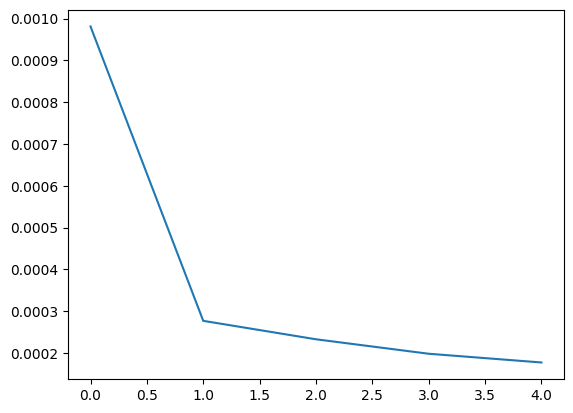

In [24]:
plt.plot(model.history.history['loss'])

In [25]:
pred_sc = model.predict(X_test)
pred = sc.inverse_transform(pred_sc)
y_test_ic = sc.inverse_transform(y_test)

215/215 ━━━━━━━━━━━━━━━━━━━━ 27s 125ms/step


The Coefficient of determination (R-squared) = 0.983


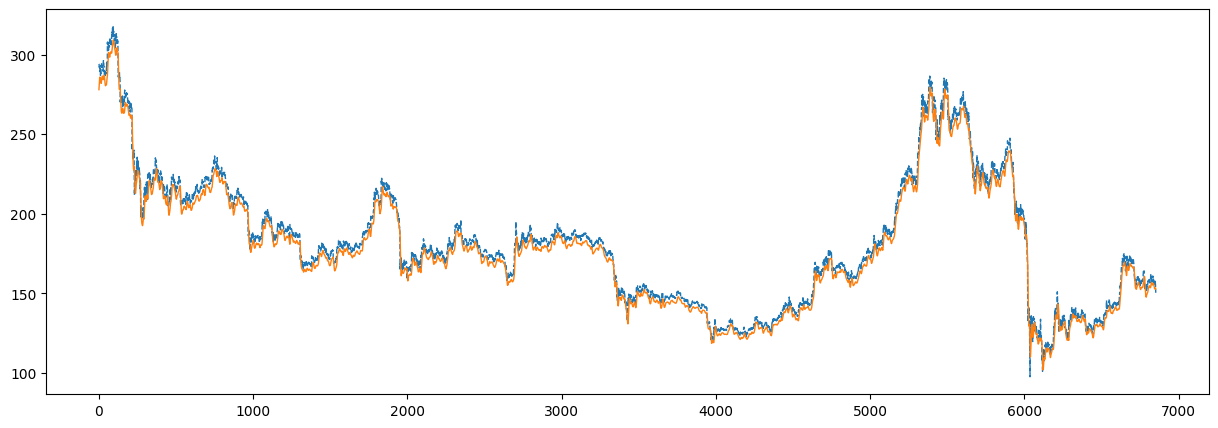

In [26]:
print('The Coefficient of determination (R-squared) = {:.3f}'.format(r2_score(pred,y_test_ic)))

plt.figure(figsize=(15,5))
plt.plot(y_test_ic,'--',label='Actual',linewidth=1)
plt.plot(pred,label='Predicted',linewidth=1)

# Future Prediction

In [27]:
model = Sequential()
model.add(LSTM(100,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')

/home/gustavolamonica/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
#training on entire dataset

X = windows_sc
y = target_sc

model.fit(X,y, epochs=5, batch_size=64, verbose=1)

Epoch 1/5
536/536 ━━━━━━━━━━━━━━━━━━━━ 211s 389ms/step - loss: 0.0020
Epoch 2/5
536/536 ━━━━━━━━━━━━━━━━━━━━ 207s 387ms/step - loss: 2.1635e-04
Epoch 3/5
536/536 ━━━━━━━━━━━━━━━━━━━━ 191s 356ms/step - loss: 1.6622e-04
Epoch 4/5
536/536 ━━━━━━━━━━━━━━━━━━━━ 70s 130ms/step - loss: 1.4382e-04
Epoch 5/5
536/536 ━━━━━━━━━━━━━━━━━━━━ 76s 141ms/step - loss: 1.3128e-04


In [29]:
from datetime import datetime
from tqdm import tqdm

str_d1 = '2019/04/16'
str_d2 = '2019/05/16'

# convert string to date object
d1 = datetime.strptime(str_d1, "%Y/%m/%d")
d2 = datetime.strptime(str_d2, "%Y/%m/%d")

delta = d2-d1
steps_in_future = delta.days * 24
print("Steps in future: ",steps_in_future)



Steps in future:  720


In [30]:
#iterative prediction of each future step

f_wind=windows_sc[-1]
f_tar=target_sc[-1]
new=[]

for i in tqdm(range(steps_in_future)):
    curr = np.append(f_wind[1:],[f_tar]).reshape(-1,1)
    #print(curr,end="\n\n")
    next_pred = model.predict(curr.reshape(1,length,1))
    #pred_ic = sc.inverse_transform(next_pred)
    new.append(next_pred[0][0])
    f_wind = curr
    f_tar=next_pred
    

  0%|                                                                                           | 0/720 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  0%|                                                                                   | 1/720 [00:00<02:03,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  0%|▎                                                                                  | 3/720 [00:00<01:04, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  1%|▌                                                                                  | 5/720 [00:00<00:57, 12.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  1%|▊                                                                                  | 7/720 [00:00<00:54, 13.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


  1%|█                                                                                  | 9/720 [00:00<00:50, 14.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


  2%|█▎                                                                                | 11/720 [00:00<00:47, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


  2%|█▍                                                                                | 13/720 [00:00<00:47, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


  2%|█▋                                                                                | 15/720 [00:01<00:45, 15.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  2%|█▉                                                                                | 17/720 [00:01<00:44, 15.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


  3%|██▏                                                                               | 19/720 [00:01<00:44, 15.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


  3%|██▍                                                                               | 21/720 [00:01<00:43, 15.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  3%|██▌                                                                               | 23/720 [00:01<00:44, 15.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  3%|██▊                                                                               | 25/720 [00:01<00:45, 15.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  4%|███                                                                               | 27/720 [00:01<00:45, 15.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  4%|███▎                                                                              | 29/720 [00:01<00:45, 15.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


  4%|███▌                                                                              | 31/720 [00:02<00:46, 14.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  5%|███▊                                                                              | 33/720 [00:02<00:44, 15.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


  5%|███▉                                                                              | 35/720 [00:02<00:43, 15.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


  5%|████▏                                                                             | 37/720 [00:02<00:41, 16.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  5%|████▍                                                                             | 39/720 [00:02<00:42, 16.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  6%|████▋                                                                             | 41/720 [00:02<00:43, 15.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  6%|████▉                                                                             | 43/720 [00:02<00:43, 15.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  6%|█████▏                                                                            | 45/720 [00:02<00:43, 15.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  7%|█████▎                                                                            | 47/720 [00:03<00:42, 15.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


  7%|█████▌                                                                            | 49/720 [00:03<00:42, 15.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  7%|█████▊                                                                            | 51/720 [00:03<00:42, 15.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  7%|██████                                                                            | 53/720 [00:03<00:42, 15.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  8%|██████▎                                                                           | 55/720 [00:03<00:50, 13.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


  8%|██████▍                                                                           | 57/720 [00:03<00:50, 13.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  8%|██████▋                                                                           | 59/720 [00:03<00:47, 13.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  8%|██████▉                                                                           | 61/720 [00:04<00:46, 14.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  9%|███████▏                                                                          | 63/720 [00:04<00:44, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  9%|███████▍                                                                          | 65/720 [00:04<00:44, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


  9%|███████▋                                                                          | 67/720 [00:04<00:42, 15.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 10%|███████▊                                                                          | 69/720 [00:04<00:41, 15.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 10%|████████                                                                          | 71/720 [00:04<00:40, 15.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 10%|████████▎                                                                         | 73/720 [00:04<00:40, 15.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 10%|████████▌                                                                         | 75/720 [00:04<00:40, 16.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 11%|████████▊                                                                         | 77/720 [00:05<00:39, 16.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 11%|████████▉                                                                         | 79/720 [00:05<00:39, 16.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 11%|█████████▏                                                                        | 81/720 [00:05<00:39, 16.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 12%|█████████▍                                                                        | 83/720 [00:05<00:39, 16.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 12%|█████████▋                                                                        | 85/720 [00:05<00:39, 16.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 12%|█████████▉                                                                        | 87/720 [00:05<00:38, 16.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 12%|██████████▏                                                                       | 89/720 [00:05<00:39, 15.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 13%|██████████▎                                                                       | 91/720 [00:05<00:39, 15.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 13%|██████████▌                                                                       | 93/720 [00:06<00:38, 16.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 13%|██████████▊                                                                       | 95/720 [00:06<00:39, 15.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 13%|███████████                                                                       | 97/720 [00:06<00:40, 15.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 14%|███████████▎                                                                      | 99/720 [00:06<00:39, 15.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 14%|███████████▎                                                                     | 101/720 [00:06<00:39, 15.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 14%|███████████▌                                                                     | 103/720 [00:06<00:38, 15.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 15%|███████████▊                                                                     | 105/720 [00:06<00:37, 16.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 15%|████████████                                                                     | 107/720 [00:06<00:38, 15.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 15%|████████████▎                                                                    | 109/720 [00:07<00:40, 15.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 15%|████████████▍                                                                    | 111/720 [00:07<00:39, 15.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 16%|████████████▋                                                                    | 113/720 [00:07<00:40, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 16%|████████████▉                                                                    | 115/720 [00:07<00:39, 15.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 16%|█████████████▏                                                                   | 117/720 [00:07<00:38, 15.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 17%|█████████████▍                                                                   | 119/720 [00:07<00:38, 15.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 17%|█████████████▌                                                                   | 121/720 [00:07<00:36, 16.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 17%|█████████████▊                                                                   | 123/720 [00:07<00:35, 16.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 17%|██████████████                                                                   | 125/720 [00:08<00:45, 13.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 18%|██████████████▎                                                                  | 127/720 [00:08<00:56, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 18%|██████████████▌                                                                  | 129/720 [00:08<00:54, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 18%|██████████████▋                                                                  | 131/720 [00:08<00:52, 11.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 18%|██████████████▉                                                                  | 133/720 [00:08<00:50, 11.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 19%|███████████████▏                                                                 | 135/720 [00:09<00:51, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 19%|███████████████▍                                                                 | 137/720 [00:09<00:55, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 19%|███████████████▋                                                                 | 139/720 [00:09<00:58,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 20%|███████████████▊                                                                 | 141/720 [00:09<00:57,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 20%|████████████████                                                                 | 143/720 [00:10<00:57, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 20%|████████████████▎                                                                | 145/720 [00:10<00:59,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 20%|████████████████▍                                                                | 146/720 [00:10<00:59,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 21%|████████████████▋                                                                | 148/720 [00:10<00:57, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 21%|████████████████▉                                                                | 150/720 [00:10<00:57,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 21%|████████████████▉                                                                | 151/720 [00:10<01:00,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 21%|█████████████████                                                                | 152/720 [00:10<00:59,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 21%|█████████████████▏                                                               | 153/720 [00:11<01:01,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 21%|█████████████████▎                                                               | 154/720 [00:11<01:05,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 22%|█████████████████▍                                                               | 155/720 [00:11<01:03,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 22%|█████████████████▌                                                               | 156/720 [00:11<01:01,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 22%|█████████████████▊                                                               | 158/720 [00:11<00:55, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 22%|██████████████████                                                               | 160/720 [00:11<00:51, 10.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 22%|██████████████████▏                                                              | 162/720 [00:11<00:50, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 23%|██████████████████▍                                                              | 164/720 [00:12<00:52, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 23%|██████████████████▋                                                              | 166/720 [00:12<00:51, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 23%|██████████████████▉                                                              | 168/720 [00:12<00:49, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 24%|███████████████████▏                                                             | 170/720 [00:12<00:46, 11.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 24%|███████████████████▎                                                             | 172/720 [00:12<00:43, 12.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 24%|███████████████████▌                                                             | 174/720 [00:12<00:40, 13.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 24%|███████████████████▊                                                             | 176/720 [00:13<00:39, 13.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 25%|████████████████████                                                             | 178/720 [00:13<00:38, 14.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 25%|████████████████████▎                                                            | 180/720 [00:13<00:37, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 25%|████████████████████▍                                                            | 182/720 [00:13<00:36, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 26%|████████████████████▋                                                            | 184/720 [00:13<00:37, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 26%|████████████████████▉                                                            | 186/720 [00:13<00:36, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 26%|█████████████████████▏                                                           | 188/720 [00:13<00:35, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 26%|█████████████████████▍                                                           | 190/720 [00:13<00:34, 15.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 27%|█████████████████████▌                                                           | 192/720 [00:14<00:36, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 27%|█████████████████████▊                                                           | 194/720 [00:14<00:36, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 27%|██████████████████████                                                           | 196/720 [00:14<00:36, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 28%|██████████████████████▎                                                          | 198/720 [00:14<00:35, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 28%|██████████████████████▌                                                          | 200/720 [00:14<00:34, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 28%|██████████████████████▋                                                          | 202/720 [00:14<00:39, 13.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 28%|██████████████████████▉                                                          | 204/720 [00:15<00:42, 12.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 29%|███████████████████████▏                                                         | 206/720 [00:15<00:45, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 29%|███████████████████████▍                                                         | 208/720 [00:15<00:45, 11.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 29%|███████████████████████▋                                                         | 210/720 [00:15<00:46, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 29%|███████████████████████▊                                                         | 212/720 [00:15<00:45, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 30%|████████████████████████                                                         | 214/720 [00:16<00:48, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 30%|████████████████████████▎                                                        | 216/720 [00:16<00:49, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 30%|████████████████████████▌                                                        | 218/720 [00:16<00:48, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 31%|████████████████████████▊                                                        | 220/720 [00:16<00:46, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 31%|████████████████████████▉                                                        | 222/720 [00:16<00:44, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 31%|█████████████████████████▏                                                       | 224/720 [00:16<00:44, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 31%|█████████████████████████▍                                                       | 226/720 [00:17<00:44, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 32%|█████████████████████████▋                                                       | 228/720 [00:17<00:44, 11.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 32%|█████████████████████████▊                                                       | 230/720 [00:17<00:44, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 32%|██████████████████████████                                                       | 232/720 [00:17<00:44, 10.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 32%|██████████████████████████▎                                                      | 234/720 [00:17<00:46, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 33%|██████████████████████████▌                                                      | 236/720 [00:18<00:46, 10.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 33%|██████████████████████████▊                                                      | 238/720 [00:18<00:44, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 33%|███████████████████████████                                                      | 240/720 [00:18<00:42, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 34%|███████████████████████████▏                                                     | 242/720 [00:18<00:43, 11.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 34%|███████████████████████████▍                                                     | 244/720 [00:18<00:45, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 34%|███████████████████████████▋                                                     | 246/720 [00:18<00:45, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 34%|███████████████████████████▉                                                     | 248/720 [00:19<00:43, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 35%|████████████████████████████▏                                                    | 250/720 [00:19<00:43, 10.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 35%|████████████████████████████▎                                                    | 252/720 [00:19<00:43, 10.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 35%|████████████████████████████▌                                                    | 254/720 [00:19<00:42, 11.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 36%|████████████████████████████▊                                                    | 256/720 [00:19<00:40, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 36%|█████████████████████████████                                                    | 258/720 [00:20<00:38, 11.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 36%|█████████████████████████████▎                                                   | 260/720 [00:20<00:36, 12.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 36%|█████████████████████████████▍                                                   | 262/720 [00:20<00:36, 12.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 37%|█████████████████████████████▋                                                   | 264/720 [00:20<00:34, 13.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 37%|█████████████████████████████▉                                                   | 266/720 [00:20<00:32, 13.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 37%|██████████████████████████████▏                                                  | 268/720 [00:20<00:33, 13.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 38%|██████████████████████████████▍                                                  | 270/720 [00:20<00:32, 13.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 38%|██████████████████████████████▌                                                  | 272/720 [00:20<00:31, 14.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 38%|██████████████████████████████▊                                                  | 274/720 [00:21<00:32, 13.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 38%|███████████████████████████████                                                  | 276/720 [00:21<00:32, 13.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 39%|███████████████████████████████▎                                                 | 278/720 [00:21<00:31, 14.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 39%|███████████████████████████████▌                                                 | 280/720 [00:21<00:32, 13.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 39%|███████████████████████████████▋                                                 | 282/720 [00:21<00:36, 12.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 39%|███████████████████████████████▉                                                 | 284/720 [00:21<00:35, 12.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 40%|████████████████████████████████▏                                                | 286/720 [00:22<00:33, 12.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 40%|████████████████████████████████▍                                                | 288/720 [00:22<00:32, 13.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 40%|████████████████████████████████▋                                                | 290/720 [00:22<00:30, 14.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 41%|████████████████████████████████▊                                                | 292/720 [00:22<00:28, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 41%|█████████████████████████████████                                                | 294/720 [00:22<00:27, 15.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 41%|█████████████████████████████████▎                                               | 296/720 [00:22<00:27, 15.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 41%|█████████████████████████████████▌                                               | 298/720 [00:22<00:27, 15.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 42%|█████████████████████████████████▊                                               | 300/720 [00:22<00:27, 15.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 42%|█████████████████████████████████▉                                               | 302/720 [00:23<00:27, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 42%|██████████████████████████████████▏                                              | 304/720 [00:23<00:28, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 42%|██████████████████████████████████▍                                              | 306/720 [00:23<00:27, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 43%|██████████████████████████████████▋                                              | 308/720 [00:23<00:27, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 43%|██████████████████████████████████▉                                              | 310/720 [00:23<00:27, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 43%|███████████████████████████████████                                              | 312/720 [00:23<00:27, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 44%|███████████████████████████████████▎                                             | 314/720 [00:23<00:27, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 44%|███████████████████████████████████▌                                             | 316/720 [00:24<00:28, 14.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 44%|███████████████████████████████████▊                                             | 318/720 [00:24<00:31, 12.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 44%|████████████████████████████████████                                             | 320/720 [00:24<00:30, 13.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 45%|████████████████████████████████████▏                                            | 322/720 [00:24<00:30, 12.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 45%|████████████████████████████████████▍                                            | 324/720 [00:24<00:29, 13.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 45%|████████████████████████████████████▋                                            | 326/720 [00:24<00:28, 13.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 46%|████████████████████████████████████▉                                            | 328/720 [00:24<00:28, 13.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 46%|█████████████████████████████████████▏                                           | 330/720 [00:25<00:27, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 46%|█████████████████████████████████████▎                                           | 332/720 [00:25<00:26, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 46%|█████████████████████████████████████▌                                           | 334/720 [00:25<00:26, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 47%|█████████████████████████████████████▊                                           | 336/720 [00:25<00:25, 15.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


 47%|██████████████████████████████████████                                           | 338/720 [00:25<00:24, 15.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 47%|██████████████████████████████████████▎                                          | 340/720 [00:25<00:24, 15.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 48%|██████████████████████████████████████▍                                          | 342/720 [00:25<00:24, 15.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 48%|██████████████████████████████████████▋                                          | 344/720 [00:26<00:24, 15.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 48%|██████████████████████████████████████▉                                          | 346/720 [00:26<00:24, 15.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 48%|███████████████████████████████████████▏                                         | 348/720 [00:26<00:23, 15.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 49%|███████████████████████████████████████▍                                         | 350/720 [00:26<00:23, 15.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 49%|███████████████████████████████████████▌                                         | 352/720 [00:26<00:23, 15.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 49%|███████████████████████████████████████▊                                         | 354/720 [00:26<00:23, 15.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 49%|████████████████████████████████████████                                         | 356/720 [00:26<00:23, 15.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 50%|████████████████████████████████████████▎                                        | 358/720 [00:26<00:22, 15.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 50%|████████████████████████████████████████▌                                        | 360/720 [00:27<00:22, 15.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 50%|████████████████████████████████████████▋                                        | 362/720 [00:27<00:23, 15.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 51%|████████████████████████████████████████▉                                        | 364/720 [00:27<00:25, 13.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 51%|█████████████████████████████████████████▏                                       | 366/720 [00:27<00:25, 13.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 51%|█████████████████████████████████████████▍                                       | 368/720 [00:27<00:24, 14.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 51%|█████████████████████████████████████████▌                                       | 370/720 [00:27<00:24, 14.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 52%|█████████████████████████████████████████▊                                       | 372/720 [00:27<00:23, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 52%|██████████████████████████████████████████                                       | 374/720 [00:28<00:22, 15.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 52%|██████████████████████████████████████████▎                                      | 376/720 [00:28<00:22, 15.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 52%|██████████████████████████████████████████▌                                      | 378/720 [00:28<00:21, 15.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 53%|██████████████████████████████████████████▊                                      | 380/720 [00:28<00:21, 15.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 53%|██████████████████████████████████████████▉                                      | 382/720 [00:28<00:20, 16.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 53%|███████████████████████████████████████████▏                                     | 384/720 [00:28<00:20, 16.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


 54%|███████████████████████████████████████████▍                                     | 386/720 [00:28<00:20, 16.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 54%|███████████████████████████████████████████▋                                     | 388/720 [00:28<00:19, 16.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 54%|███████████████████████████████████████████▉                                     | 390/720 [00:28<00:19, 16.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 54%|████████████████████████████████████████████                                     | 392/720 [00:29<00:20, 16.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 55%|████████████████████████████████████████████▎                                    | 394/720 [00:29<00:19, 16.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 55%|████████████████████████████████████████████▌                                    | 396/720 [00:29<00:19, 16.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 55%|████████████████████████████████████████████▊                                    | 398/720 [00:29<00:19, 16.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 56%|█████████████████████████████████████████████                                    | 400/720 [00:29<00:19, 16.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 56%|█████████████████████████████████████████████▏                                   | 402/720 [00:29<00:19, 16.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 56%|█████████████████████████████████████████████▍                                   | 404/720 [00:29<00:19, 16.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 56%|█████████████████████████████████████████████▋                                   | 406/720 [00:29<00:19, 16.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 57%|█████████████████████████████████████████████▉                                   | 408/720 [00:30<00:19, 16.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 57%|██████████████████████████████████████████████▏                                  | 410/720 [00:30<00:18, 16.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 57%|██████████████████████████████████████████████▎                                  | 412/720 [00:30<00:18, 16.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 57%|██████████████████████████████████████████████▌                                  | 414/720 [00:30<00:18, 16.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 58%|██████████████████████████████████████████████▊                                  | 416/720 [00:30<00:19, 15.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 58%|███████████████████████████████████████████████                                  | 418/720 [00:30<00:18, 15.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 58%|███████████████████████████████████████████████▎                                 | 420/720 [00:30<00:18, 16.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 59%|███████████████████████████████████████████████▍                                 | 422/720 [00:30<00:18, 15.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 59%|███████████████████████████████████████████████▋                                 | 424/720 [00:31<00:18, 16.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 59%|███████████████████████████████████████████████▉                                 | 426/720 [00:31<00:18, 16.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 59%|████████████████████████████████████████████████▏                                | 428/720 [00:31<00:18, 16.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 60%|████████████████████████████████████████████████▍                                | 430/720 [00:31<00:17, 16.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 60%|████████████████████████████████████████████████▌                                | 432/720 [00:31<00:17, 16.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


 60%|████████████████████████████████████████████████▊                                | 434/720 [00:31<00:17, 16.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 61%|█████████████████████████████████████████████████                                | 436/720 [00:31<00:17, 16.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 61%|█████████████████████████████████████████████████▎                               | 438/720 [00:31<00:17, 15.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 61%|█████████████████████████████████████████████████▌                               | 440/720 [00:32<00:17, 16.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 61%|█████████████████████████████████████████████████▋                               | 442/720 [00:32<00:17, 16.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 62%|█████████████████████████████████████████████████▉                               | 444/720 [00:32<00:16, 16.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 62%|██████████████████████████████████████████████████▏                              | 446/720 [00:32<00:16, 16.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 62%|██████████████████████████████████████████████████▍                              | 448/720 [00:32<00:16, 16.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 62%|██████████████████████████████████████████████████▋                              | 450/720 [00:32<00:16, 16.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 63%|██████████████████████████████████████████████████▊                              | 452/720 [00:32<00:16, 16.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 63%|███████████████████████████████████████████████████                              | 454/720 [00:32<00:17, 15.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 63%|███████████████████████████████████████████████████▎                             | 456/720 [00:33<00:20, 13.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 64%|███████████████████████████████████████████████████▌                             | 458/720 [00:33<00:21, 12.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 64%|███████████████████████████████████████████████████▋                             | 460/720 [00:33<00:20, 12.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 64%|███████████████████████████████████████████████████▉                             | 462/720 [00:33<00:20, 12.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 64%|████████████████████████████████████████████████████▏                            | 464/720 [00:33<00:21, 11.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 65%|████████████████████████████████████████████████████▍                            | 466/720 [00:33<00:20, 12.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 65%|████████████████████████████████████████████████████▋                            | 468/720 [00:34<00:19, 13.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 65%|████████████████████████████████████████████████████▉                            | 470/720 [00:34<00:18, 13.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 66%|█████████████████████████████████████████████████████                            | 472/720 [00:34<00:18, 13.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 66%|█████████████████████████████████████████████████████▎                           | 474/720 [00:34<00:19, 12.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 66%|█████████████████████████████████████████████████████▌                           | 476/720 [00:34<00:18, 13.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 66%|█████████████████████████████████████████████████████▊                           | 478/720 [00:34<00:18, 13.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 67%|██████████████████████████████████████████████████████                           | 480/720 [00:35<00:17, 13.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 67%|██████████████████████████████████████████████████████▏                          | 482/720 [00:35<00:16, 14.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 67%|██████████████████████████████████████████████████████▍                          | 484/720 [00:35<00:16, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 68%|██████████████████████████████████████████████████████▋                          | 486/720 [00:35<00:15, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 68%|██████████████████████████████████████████████████████▉                          | 488/720 [00:35<00:15, 15.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 68%|███████████████████████████████████████████████████████▏                         | 490/720 [00:35<00:15, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 68%|███████████████████████████████████████████████████████▎                         | 492/720 [00:35<00:18, 12.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 69%|███████████████████████████████████████████████████████▌                         | 494/720 [00:36<00:19, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 69%|███████████████████████████████████████████████████████▊                         | 496/720 [00:36<00:19, 11.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 69%|████████████████████████████████████████████████████████                         | 498/720 [00:36<00:19, 11.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 69%|████████████████████████████████████████████████████████▎                        | 500/720 [00:36<00:18, 11.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 70%|████████████████████████████████████████████████████████▍                        | 502/720 [00:36<00:18, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 70%|████████████████████████████████████████████████████████▋                        | 504/720 [00:36<00:17, 12.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 70%|████████████████████████████████████████████████████████▉                        | 506/720 [00:37<00:16, 12.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 71%|█████████████████████████████████████████████████████████▏                       | 508/720 [00:37<00:16, 13.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 71%|█████████████████████████████████████████████████████████▍                       | 510/720 [00:37<00:15, 13.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 71%|█████████████████████████████████████████████████████████▌                       | 512/720 [00:37<00:14, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 71%|█████████████████████████████████████████████████████████▊                       | 514/720 [00:37<00:13, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 72%|██████████████████████████████████████████████████████████                       | 516/720 [00:37<00:13, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 72%|██████████████████████████████████████████████████████████▎                      | 518/720 [00:37<00:13, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 72%|██████████████████████████████████████████████████████████▌                      | 520/720 [00:37<00:13, 15.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 72%|██████████████████████████████████████████████████████████▋                      | 522/720 [00:38<00:12, 15.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 73%|██████████████████████████████████████████████████████████▉                      | 524/720 [00:38<00:12, 15.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 73%|███████████████████████████████████████████████████████████▏                     | 526/720 [00:38<00:12, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 73%|███████████████████████████████████████████████████████████▍                     | 528/720 [00:38<00:16, 11.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 74%|███████████████████████████████████████████████████████████▋                     | 530/720 [00:38<00:18, 10.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 74%|███████████████████████████████████████████████████████████▊                     | 532/720 [00:39<00:17, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 74%|████████████████████████████████████████████████████████████                     | 534/720 [00:39<00:16, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 74%|████████████████████████████████████████████████████████████▎                    | 536/720 [00:39<00:17, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 75%|████████████████████████████████████████████████████████████▌                    | 538/720 [00:39<00:16, 10.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 75%|████████████████████████████████████████████████████████████▊                    | 540/720 [00:39<00:15, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 75%|████████████████████████████████████████████████████████████▉                    | 542/720 [00:39<00:14, 12.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 76%|█████████████████████████████████████████████████████████████▏                   | 544/720 [00:40<00:14, 12.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 76%|█████████████████████████████████████████████████████████████▍                   | 546/720 [00:40<00:13, 13.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 76%|█████████████████████████████████████████████████████████████▋                   | 548/720 [00:40<00:12, 13.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 76%|█████████████████████████████████████████████████████████████▊                   | 550/720 [00:40<00:12, 14.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 77%|██████████████████████████████████████████████████████████████                   | 552/720 [00:40<00:11, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 77%|██████████████████████████████████████████████████████████████▎                  | 554/720 [00:40<00:11, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 77%|██████████████████████████████████████████████████████████████▌                  | 556/720 [00:40<00:11, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 78%|██████████████████████████████████████████████████████████████▊                  | 558/720 [00:40<00:10, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 78%|███████████████████████████████████████████████████████████████                  | 560/720 [00:41<00:10, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 78%|███████████████████████████████████████████████████████████████▏                 | 562/720 [00:41<00:10, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 78%|███████████████████████████████████████████████████████████████▍                 | 564/720 [00:41<00:10, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 79%|███████████████████████████████████████████████████████████████▋                 | 566/720 [00:41<00:11, 13.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 79%|███████████████████████████████████████████████████████████████▉                 | 568/720 [00:41<00:11, 13.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 79%|████████████████████████████████████████████████████████████████▏                | 570/720 [00:41<00:11, 12.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 79%|████████████████████████████████████████████████████████████████▎                | 572/720 [00:42<00:11, 13.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 80%|████████████████████████████████████████████████████████████████▌                | 574/720 [00:42<00:10, 13.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 80%|████████████████████████████████████████████████████████████████▊                | 576/720 [00:42<00:10, 13.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 80%|█████████████████████████████████████████████████████████████████                | 578/720 [00:42<00:09, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 81%|█████████████████████████████████████████████████████████████████▎               | 580/720 [00:42<00:09, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 81%|█████████████████████████████████████████████████████████████████▍               | 582/720 [00:42<00:09, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 81%|█████████████████████████████████████████████████████████████████▋               | 584/720 [00:42<00:10, 13.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 81%|█████████████████████████████████████████████████████████████████▉               | 586/720 [00:43<00:10, 12.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 82%|██████████████████████████████████████████████████████████████████▏              | 588/720 [00:43<00:10, 12.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 82%|██████████████████████████████████████████████████████████████████▍              | 590/720 [00:43<00:09, 13.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 82%|██████████████████████████████████████████████████████████████████▌              | 592/720 [00:43<00:09, 14.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 82%|██████████████████████████████████████████████████████████████████▊              | 594/720 [00:43<00:08, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 83%|███████████████████████████████████████████████████████████████████              | 596/720 [00:43<00:08, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 83%|███████████████████████████████████████████████████████████████████▎             | 598/720 [00:43<00:08, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 83%|███████████████████████████████████████████████████████████████████▌             | 600/720 [00:43<00:08, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████████▋             | 602/720 [00:44<00:07, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 84%|███████████████████████████████████████████████████████████████████▉             | 604/720 [00:44<00:07, 15.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 84%|████████████████████████████████████████████████████████████████████▏            | 606/720 [00:44<00:07, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 84%|████████████████████████████████████████████████████████████████████▍            | 608/720 [00:44<00:07, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████████▋            | 610/720 [00:44<00:07, 15.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 85%|████████████████████████████████████████████████████████████████████▊            | 612/720 [00:44<00:07, 15.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 85%|█████████████████████████████████████████████████████████████████████            | 614/720 [00:44<00:07, 13.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 86%|█████████████████████████████████████████████████████████████████████▎           | 616/720 [00:45<00:07, 13.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 86%|█████████████████████████████████████████████████████████████████████▌           | 618/720 [00:45<00:07, 13.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 86%|█████████████████████████████████████████████████████████████████████▊           | 620/720 [00:45<00:07, 12.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 86%|█████████████████████████████████████████████████████████████████████▉           | 622/720 [00:45<00:07, 12.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 87%|██████████████████████████████████████████████████████████████████████▏          | 624/720 [00:45<00:08, 11.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 87%|██████████████████████████████████████████████████████████████████████▍          | 626/720 [00:45<00:08, 11.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 87%|██████████████████████████████████████████████████████████████████████▋          | 628/720 [00:46<00:08, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 88%|██████████████████████████████████████████████████████████████████████▉          | 630/720 [00:46<00:09,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 88%|███████████████████████████████████████████████████████████████████████          | 632/720 [00:46<00:08, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 88%|███████████████████████████████████████████████████████████████████████▎         | 634/720 [00:46<00:07, 11.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 88%|███████████████████████████████████████████████████████████████████████▌         | 636/720 [00:46<00:07, 11.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 89%|███████████████████████████████████████████████████████████████████████▊         | 638/720 [00:47<00:06, 12.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 89%|████████████████████████████████████████████████████████████████████████         | 640/720 [00:47<00:06, 13.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 89%|████████████████████████████████████████████████████████████████████████▏        | 642/720 [00:47<00:05, 13.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 89%|████████████████████████████████████████████████████████████████████████▍        | 644/720 [00:47<00:05, 13.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 90%|████████████████████████████████████████████████████████████████████████▋        | 646/720 [00:47<00:05, 13.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 90%|████████████████████████████████████████████████████████████████████████▉        | 648/720 [00:47<00:05, 12.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 90%|█████████████████████████████████████████████████████████████████████████▏       | 650/720 [00:47<00:05, 12.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 91%|█████████████████████████████████████████████████████████████████████████▎       | 652/720 [00:48<00:06, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 91%|█████████████████████████████████████████████████████████████████████████▌       | 654/720 [00:48<00:07,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 91%|█████████████████████████████████████████████████████████████████████████▊       | 656/720 [00:48<00:07,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 91%|██████████████████████████████████████████████████████████████████████████       | 658/720 [00:48<00:06,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 92%|██████████████████████████████████████████████████████████████████████████▎      | 660/720 [00:49<00:06,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 92%|██████████████████████████████████████████████████████████████████████████▍      | 662/720 [00:49<00:05,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 92%|██████████████████████████████████████████████████████████████████████████▋      | 664/720 [00:49<00:06,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 92%|██████████████████████████████████████████████████████████████████████████▊      | 665/720 [00:49<00:06,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 92%|██████████████████████████████████████████████████████████████████████████▉      | 666/720 [00:49<00:06,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 93%|███████████████████████████████████████████████████████████████████████████      | 667/720 [00:49<00:05,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 93%|███████████████████████████████████████████████████████████████████████████▏     | 668/720 [00:49<00:05,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 93%|███████████████████████████████████████████████████████████████████████████▎     | 669/720 [00:50<00:05,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 93%|███████████████████████████████████████████████████████████████████████████▍     | 671/720 [00:50<00:05,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 93%|███████████████████████████████████████████████████████████████████████████▌     | 672/720 [00:50<00:05,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 94%|███████████████████████████████████████████████████████████████████████████▊     | 674/720 [00:50<00:04, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 94%|███████████████████████████████████████████████████████████████████████████▉     | 675/720 [00:50<00:04,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 94%|████████████████████████████████████████████████████████████████████████████     | 676/720 [00:50<00:04,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 94%|████████████████████████████████████████████████████████████████████████████▏    | 677/720 [00:50<00:04,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 94%|████████████████████████████████████████████████████████████████████████████▎    | 678/720 [00:51<00:04,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 94%|████████████████████████████████████████████████████████████████████████████▌    | 680/720 [00:51<00:04,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 95%|████████████████████████████████████████████████████████████████████████████▋    | 682/720 [00:51<00:03, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 95%|████████████████████████████████████████████████████████████████████████████▉    | 684/720 [00:51<00:03, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 95%|█████████████████████████████████████████████████████████████████████████████▏   | 686/720 [00:51<00:03, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 96%|█████████████████████████████████████████████████████████████████████████████▍   | 688/720 [00:51<00:02, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 96%|█████████████████████████████████████████████████████████████████████████████▋   | 690/720 [00:52<00:02, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 96%|█████████████████████████████████████████████████████████████████████████████▊   | 692/720 [00:52<00:02, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 96%|██████████████████████████████████████████████████████████████████████████████   | 694/720 [00:52<00:02, 10.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 97%|██████████████████████████████████████████████████████████████████████████████▎  | 696/720 [00:52<00:02, 11.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 97%|██████████████████████████████████████████████████████████████████████████████▌  | 698/720 [00:52<00:01, 12.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 97%|██████████████████████████████████████████████████████████████████████████████▊  | 700/720 [00:52<00:01, 13.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▉  | 702/720 [00:53<00:01, 13.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 98%|███████████████████████████████████████████████████████████████████████████████▏ | 704/720 [00:53<00:01, 13.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 98%|███████████████████████████████████████████████████████████████████████████████▍ | 706/720 [00:53<00:01, 13.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 98%|███████████████████████████████████████████████████████████████████████████████▋ | 708/720 [00:53<00:00, 13.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▉ | 710/720 [00:53<00:00, 13.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 99%|████████████████████████████████████████████████████████████████████████████████ | 712/720 [00:53<00:00, 13.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 99%|████████████████████████████████████████████████████████████████████████████████▎| 714/720 [00:53<00:00, 13.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 99%|████████████████████████████████████████████████████████████████████████████████▌| 716/720 [00:54<00:00, 13.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


100%|████████████████████████████████████████████████████████████████████████████████▊| 718/720 [00:54<00:00, 14.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


100%|█████████████████████████████████████████████████████████████████████████████████| 720/720 [00:54<00:00, 13.25it/s]


In [31]:
new = sc.inverse_transform(np.array(new).reshape(-1,1))

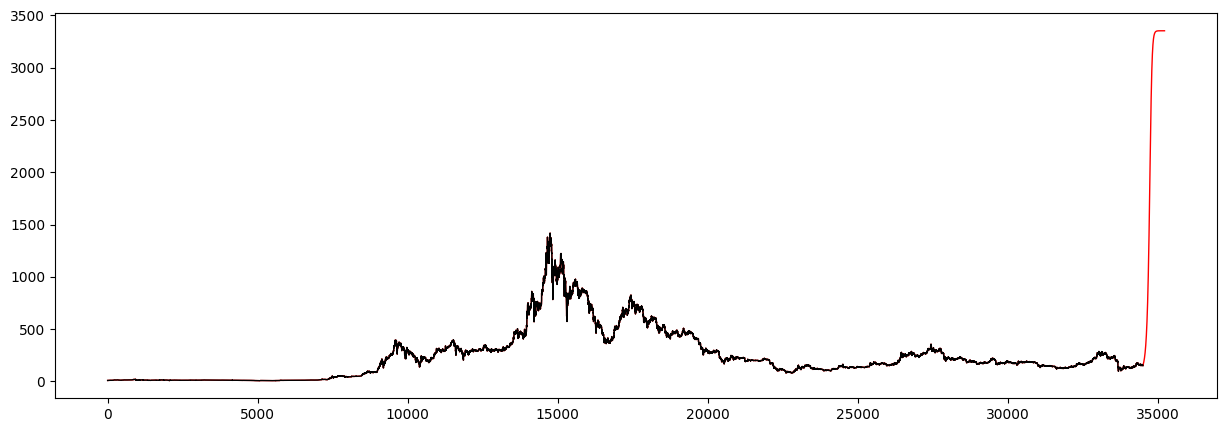

In [32]:
out = []
out = np.append(df.Close.values,new)
plt.figure(figsize=(15,5))
plt.plot(out,linewidth=1,color='red')
plt.plot(df.Close.values,linewidth=1,color='black')
plt.show()

In [33]:
len(out),len(df.Close)

(35217, 34497)

# Saving the model

In [34]:
import pickle


model.save('model.h5')
filename = 'scaler.pkl'
f = open(filename, 'wb')
pickle.dump(sc,f )
f.close()


In [35]:
with open('window.npy', 'wb') as f:
    np.save(f, windows_sc)
with open('target.npy', 'wb') as f:
    np.save(f, target_sc)

NameError: name 'window' is not defined